In [106]:
import hvplot.pandas
import pandas as pd
import geopy.distance
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

from school_digger_api_key import geoapify_key

In [107]:
school_data_22_19= Path("school_data_22-19.csv")
school_data_22_19_df=pd.read_csv(school_data_22_19)
school_data_22_21 = Path("school_data_22-21.csv")
school_data_22_21_df=pd.read_csv(school_data_22_21)

In [108]:
austincoord=(30.267200,-97.743100)
lats_22_21=school_data_22_21_df['lats'].to_numpy()
lats_22_19=school_data_22_19_df['lats'].to_numpy()
longs_22_21=school_data_22_21_df['longs'].to_numpy()
longs_22_19=school_data_22_19_df['longs'].to_numpy()
ditsance_to_austin_center_22_21=[]
ditsance_to_austin_center_22_19=[]

In [109]:
for i in range(len(lats_22_21)):
    coord=(lats_22_21[i],longs_22_21[i])
    ditsance_to_austin_center_22_21.append(geopy.distance.geodesic(coord, austincoord).km)
for i in range(len(lats_22_19)):
    coord=(lats_22_19[i],longs_22_19[i])
    ditsance_to_austin_center_22_19.append(geopy.distance.geodesic(coord, austincoord).km)

In [110]:
school_data_22_21_df['Distance_to_City_Center']=ditsance_to_austin_center_22_21
school_data_22_19_df['Distance_to_City_Center']=ditsance_to_austin_center_22_19
school_data_22_21_df['Distance_to_City_Center']=school_data_22_21_df['Distance_to_City_Center']/1.609344
school_data_22_19_df['Distance_to_City_Center']=school_data_22_19_df['Distance_to_City_Center']/1.609344



The r-value is: -0.30493395241130217


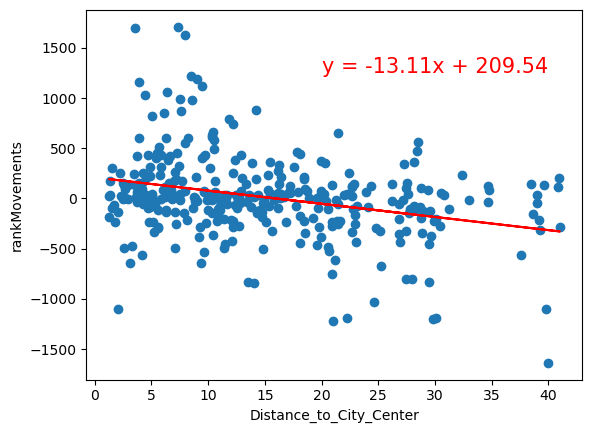

In [111]:

x_values = school_data_22_21_df['Distance_to_City_Center']
y_values = school_data_22_21_df['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,1250),fontsize=15,color="red")
plt.xlabel('Distance_to_City_Center')
plt.ylabel('rankMovements')
plt.show()


The r-value is: -0.3640964233463857


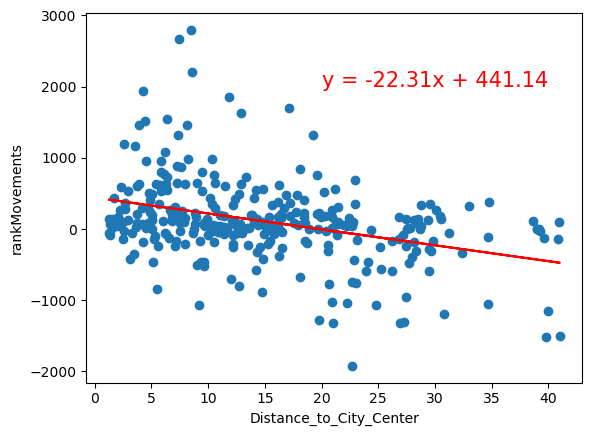

In [112]:
school_data_22_19_df['rankMovements']=school_data_22_19_df['ranks21']-school_data_22_19_df['ranks19']
x_values = school_data_22_19_df['Distance_to_City_Center']
y_values = school_data_22_19_df['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,2000),fontsize=15,color="red")
plt.xlabel('Distance_to_City_Center')
plt.ylabel('rankMovements')
plt.show()

In [150]:
%%capture --no-display

map_plot = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='High'].hvplot.points(
    "longs",
    "lats",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "averageStandardScores22",
    scale = 2,
    color = "countyNames"
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longs,lats]   (countyNames,averageStandardScores22)

In [151]:
map_plot = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='High'].hvplot.points(
    "longs",
    "lats",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "averageStandardScores21",
    scale = 2,
    color = "countyNames"
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longs,lats]   (countyNames,averageStandardScores21)

In [152]:
map_plot = school_data_22_19_df.loc[school_data_22_19_df['rankLevels']=='High'].hvplot.points(
    "longs",
    "lats",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "averageStandardScores19",
    scale = 2,
    color = "countyNames"
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longs,lats]   (countyNames,averageStandardScores19)

In [153]:
map_plot = school_data_22_18_df.loc[school_data_22_18_df['rankLevels']=='High'].hvplot.points(
    "longs",
    "lats",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "averageStandardScores18",
    scale = 2,
    color = "countyNames"
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longs,lats]   (countyNames,averageStandardScores18)